In [1]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#import unidecode
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Clasificacion binaria de noticias Fake o True

In [2]:
df_true=pd.read_csv('../Data/True.csv')
df_fake=pd.read_csv('../Data/Fake.csv')

In [3]:
print(df_fake.shape) ; df_fake.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
print(df_true.shape) ; df_true.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#Agregamos una coluna de clase 1 para las noticias fake y 0 par las true
df_fake['class']=1
df_true['class']=0

In [6]:
#Concatenamos ambos datasets
df=pd.concat([df_fake,df_true],ignore_index=True)
print(df.shape)
df.sample(5)

(44898, 5)


,title,text,subject,date,class
34443,Texas prosecutor offers probation to anti-abor...,HOUSTON (Reuters) - An anti-abortion activist ...,politicsNews,"February 4, 2016",0
22057,"‘Trump, Russia, Possible Collusion’ (REMIX)",Russiagate. First it was Russian hacking our e...,US_News,"July 28, 2017",1
34566,Senate Democrats united on debt restructuring ...,"SAN JUAN (Reuters) - U.S. Senate Democrats, in...",politicsNews,"January 27, 2016",0
38954,Egypt Western Desert attack exposes front outs...,CAIRO (Reuters) - A deadly attack on the polic...,worldnews,"November 7, 2017",0
1908,Racist NYPD Cops Threaten To Tase Black Child...,Now that Donald Trump is president and Jeff Se...,News,"April 3, 2017",1


# Exploratory Data Analysis (EDA) and Data Wrangling

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### WordCloud de noticias falsas

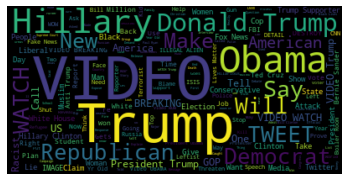

In [8]:
text=' '.join(i for i in df_fake.title)
wordcloud=WordCloud(max_words=200).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WordCloud de noticias reales 

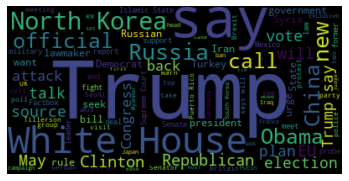

In [9]:
#Armamos una nube de palabras para las true news

text=' '.join(i for i in df_true.title)
wordcloud=WordCloud(max_words=200).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
df.duplicated().sum()

209

In [11]:
#Valores duplicados en titulos
print(df.title.duplicated(keep=False).sum())
#Observamos algunos duplicados 
df.loc[df.title.duplicated()]

11798


,title,text,subject,date,class
1535,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 10, 2017",1
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",1
10920,MEDIA IGNORES Time That Bill Clinton FIRED His...,At the recommendation of both Attorney General...,politics,"May 10, 2017",1
10924,MEDIA IGNORES Time That Bill Clinton FIRED His...,"In its 109-year history, only one F.B.I. direc...",politics,"May 10, 2017",1
10930,FORMER FBI ASST DIRECTOR: “Jim Comey ‘Danced W...,He threw the reputation of the FBI under the ...,politics,"May 9, 2017",1
...,...,...,...,...,...
44883,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",0
44884,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",0
44886,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",0
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0


In [12]:
#Vemos que hay casos en los cuales los titulos son exactamente iguales pero el texto no 
df.loc[[10920,10924],:]

,title,text,subject,date,class
10920,MEDIA IGNORES Time That Bill Clinton FIRED His...,At the recommendation of both Attorney General...,politics,"May 10, 2017",1
10924,MEDIA IGNORES Time That Bill Clinton FIRED His...,"In its 109-year history, only one F.B.I. direc...",politics,"May 10, 2017",1


In [13]:
#El numero de duplicados por titulo y clase coincide con el de duplicados solo por clase (es decir que todos los titulos duplicados pertenecen a la misma clase)
df[['title','class']].duplicated(keep=False).sum()

11798

In [14]:
#Eliminamos las noticias con titulo duplicado, quedandonos solo con los primeros 
df.drop_duplicates(subset=['title'],keep='first',inplace=True)
df.reset_index()
df.shape

(38729, 5)

In [15]:
df['class'].value_counts(1)

0    0.537737
1    0.462263
Name: class, dtype: float64

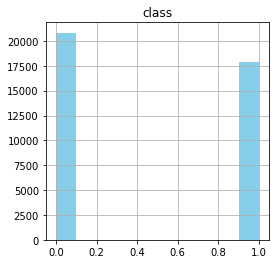

In [16]:
df.hist(figsize=(4,4), color='skyblue');

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38729 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38729 non-null  object
 1   text     38729 non-null  object
 2   subject  38729 non-null  object
 3   date     38729 non-null  object
 4   class    38729 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [88]:
df['subject'].value_counts(1)

Text(0.5, 0, 'Seccion')

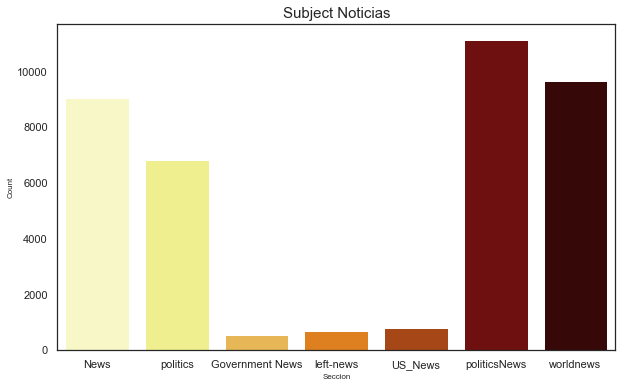

In [19]:
plt.figure(figsize=(10,6))
sns.set(style='white',context='notebook')
sns.countplot(df['subject'],palette='afmhot_r');

plt.title('Subject noticias'.title(),fontsize=15);
plt.ylabel('count'.title(), fontsize=8)
plt.xlabel('seccion'.title(), fontsize=8)

In [20]:
#Extraemos el anno de date

pattern_year=r'(\d{4})'

df['year']=df.date.str.extract(pattern_year)
df.year.value_counts()

2017    22951
2016    14093
2015     1646
Name: year, dtype: int64

In [21]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
class       0
year       39
dtype: int64

In [22]:
#Dropeamos los 39 casos que quedaron con el year nulo
df.dropna(subset=['year'],inplace=True)
df.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
year       0
dtype: int64

In [23]:
df.head()

,title,text,subject,date,class,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,2017
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,2017
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,2017
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,2017
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,2017


In [24]:
#Unificamos en un unico campo la concatenacion de los titulos y las noticias para que sea nuestra x
df['news']=df.title+' '+df.text

In [25]:
df.head(3)

,title,text,subject,date,class,year,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,2017,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,2017,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,2017,Sheriff David Clarke Becomes An Internet Joke...


In [26]:
df['subject'].value_counts()

politicsNews       11150
worldnews           9676
News                9049
politics            6796
US_News              783
left-news            704
Government News      532
Name: subject, dtype: int64

In [27]:
df.groupby(['subject','class'])['news'].count()

subject          class
Government News  1          532
News             1         9049
US_News          1          783
left-news        1          704
politics         1         6796
politicsNews     0        11150
worldnews        0         9676
Name: news, dtype: int64

Arriba vimos como es la variedad de noricias segun la seccion, considerando los True y los False.
Esto puede generar un problame de prediccion porque le va a porner 0 a todas las de la clase politicsNews y worldnews.

Para solucionar esto, unificamos algunas clases. En primer lugar, vemos que las clases 'politics' y 'politicsNews' tienen diferente nombre porque provienen de datasets diferentes. Ademas, como la clase 'left_news' y 'Government News' son minoritarias, las incluimos dentro de la clase 'politics'.

In [28]:
subject_replace={
    'politicsNews':'politics',
    'US_News':'News',
    'Government News':'politics',
    'left-news':'politics'}
df['new_subject']=df.subject

for key in subject_replace:
    df['new_subject']=df.new_subject.str.replace(key,subject_replace[key])
df.new_subject.value_counts(1)

politics     0.495787
News         0.254123
worldnews    0.250090
Name: new_subject, dtype: float64

Text(0.5, 0, 'Seccion')

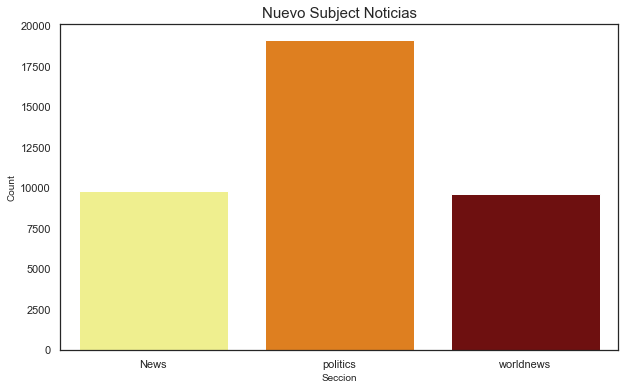

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df['new_subject'],palette='afmhot_r');

plt.title('Nuevo subject noticias'.title(),fontsize=15);
plt.ylabel('count'.title(), fontsize=10)
plt.xlabel('seccion'.title(), fontsize=10)

In [30]:
#Dropeamos las categorias originales para no confundie al modelo
df.drop(['subject'], axis=1,inplace=True)
df.head()

,title,text,date,class,year,news,new_subject
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",1,2017,Donald Trump Sends Out Embarrassing New Year’...,News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",1,2017,Drunk Bragging Trump Staffer Started Russian ...,News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",1,2017,Sheriff David Clarke Becomes An Internet Joke...,News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",1,2017,Trump Is So Obsessed He Even Has Obama’s Name...,News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",1,2017,Pope Francis Just Called Out Donald Trump Dur...,News


## Extraemos el año y el mes de la columna date

In [31]:
#Extraemos los annos
pattern_year=r'(\d{4})'
df['year']=df.date.str.extract(pattern_year)
df.year.value_counts()

2017    22951
2016    14093
2015     1646
Name: year, dtype: int64

In [32]:
#Extraemos los meses de date
pattern_month = r"([a-zA-Z]{3})"
df['month']=df.date.str.extract(pattern_month)
df.month.value_counts()

Nov    4912
Oct    4836
Sep    4675
Dec    3995
Mar    2856
Jan    2691
Feb    2570
May    2560
Apr    2479
Jun    2429
Aug    2348
Jul    2337
htt       2
Name: month, dtype: int64

In [33]:
mask_htt=df['month']=='htt'
df.drop(df[mask_htt].index,inplace=True)

In [34]:
df.new_subject.value_counts()

politics     19180
News          9832
worldnews     9676
Name: new_subject, dtype: int64

In [35]:
(df['news']==0).all()

False

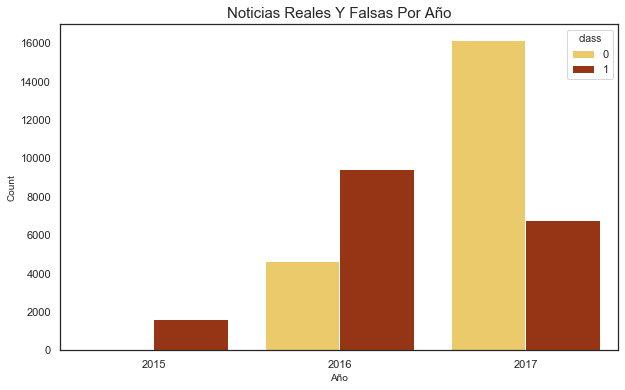

In [36]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df['year'],hue=df['class'],data=df,palette='afmhot_r');

plt.title('Noticias reales y falsas por año'.title(),fontsize=15);
plt.ylabel('count'.title(), fontsize=10);
plt.xlabel('Año'.title(), fontsize=10);

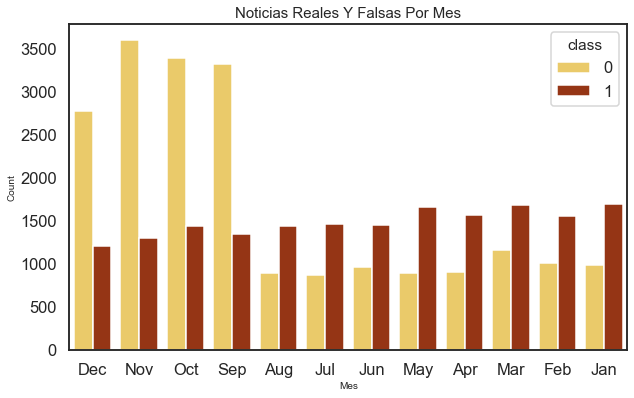

In [37]:
sns.set(style='white',context='talk')
plt.figure(figsize=(10,6))
ax=sns.countplot(df['month'],hue=df['class'],data=df,palette='afmhot_r')

plt.title('Noticias reales y falsas por mes'.title(),fontsize=15);
plt.ylabel('count'.title(), fontsize=10)
plt.xlabel('Mes'.title(), fontsize=10);

In [38]:
#Encodeamos las variables categoricas del modelo
df=pd.get_dummies(df,prefix=['subject','month','year'],columns=['new_subject','month','year'])

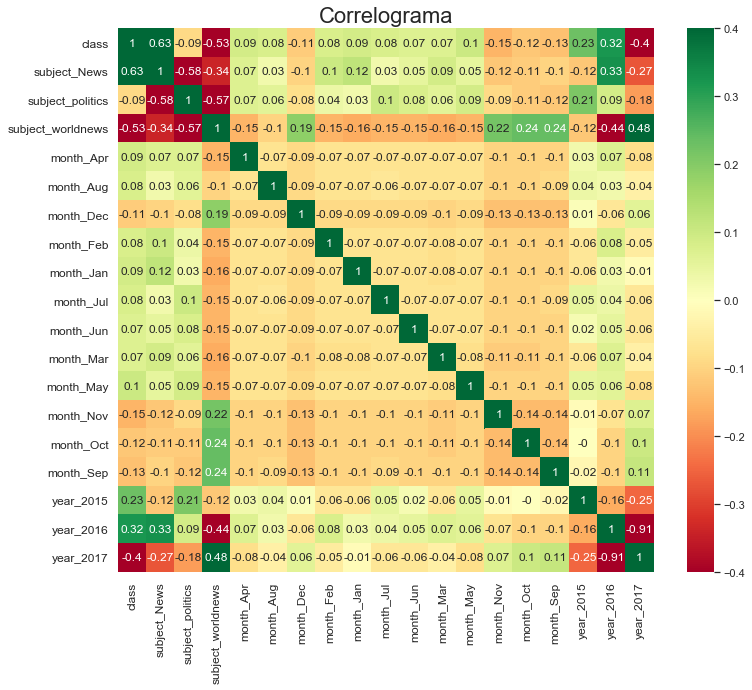

In [45]:
plt.figure(figsize=(12,10))
sns.set(style='white',context='notebook')
sns_plot=sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn',vmin=-0.4, vmax=0.4, center=0,annot=True)
plt.title('Correlograma', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#sns_plot.figure.savefig("correlograma.png")
plt.show()

## Instanciamos el CountVectorizer con un maximo de 15000 palabras

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Acer
[nltk_data]     E15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
#Instanciamos el CountVectorizer
stop_words=stopwords.words('english')

vec= CountVectorizer(stop_words=stop_words,lowercase=True,strip_accents='unicode',max_features=15000)

## Split

In [42]:
#Separamos en train y test
X=df.drop(columns=['class','text','title','date'])
y=df['class']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=df['class'],random_state=42,test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29016, 19), (9672, 19), (29016,), (9672,))

In [43]:
import time
tok=time.time()
X_train_news=vec.fit_transform(X_train['news'])
print("--- %s seconds ---" % (time.time() - tok))

--- 43.736916303634644 seconds ---


In [44]:
tok=time.time()
X_test_news=vec.transform(X_test['news'])
print("--- %s seconds ---" % (time.time() - tok))

--- 16.90877056121826 seconds ---


In [46]:
X_train_news=X_train_news.todense()

In [47]:
X_train_news=pd.DataFrame(X_train_news)

In [48]:
X_train.shape,X_train_news.shape

((29016, 19), (29016, 15000))

In [49]:
X_train_news.index=X_train.index


In [50]:
X_train=pd.concat([X_train.drop(columns=['news']),X_train_news],axis=1)

In [51]:
X_train.shape

(29016, 15018)

In [52]:
X_test_news=X_test_news.todense()

In [53]:
X_test_news=pd.DataFrame(X_test_news)

In [54]:
X_test_news.index=X_test.index

In [55]:
X_test=pd.concat([X_test.drop(columns=['news']),X_test_news],axis=1)

In [56]:
X_test.shape,X_train.shape

((9672, 15018), (29016, 15018))

In [57]:
#Separamos el conjunto de validacion
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4)
X_val.shape,X_test.shape,y_val.shape,y_test.shape

((5803, 15018), (3869, 15018), (5803,), (3869,))

# Redes Neuronales

In [58]:
#Importamos lo que necesitamos para la red
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

C:\Anaconda\envs\dhdsblend\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\dhdsblend\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\dhdsblend\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\dhdsblend\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [59]:
X_train.shape,X_train.shape[1]
X_train.columns

Index([     'subject_News',  'subject_politics', 'subject_worldnews',
               'month_Apr',         'month_Aug',         'month_Dec',
               'month_Feb',         'month_Jan',         'month_Jul',
               'month_Jun',
       ...
                     14990,               14991,               14992,
                     14993,               14994,               14995,
                     14996,               14997,               14998,
                     14999],
      dtype='object', length=15018)

## Modelo 1: simple, sin callbacks ni regularizacion

In [94]:
#Primero probamos una red neuronal sin callbacks con dos capas para ver como performa
model= Sequential()
model.add(Dense(15,activation='relu',input_shape=(15018,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 15)                225285    
_________________________________________________________________
dense_66 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 11        
Total params: 225,456
Trainable params: 225,456
Non-trainable params: 0
_________________________________________________________________


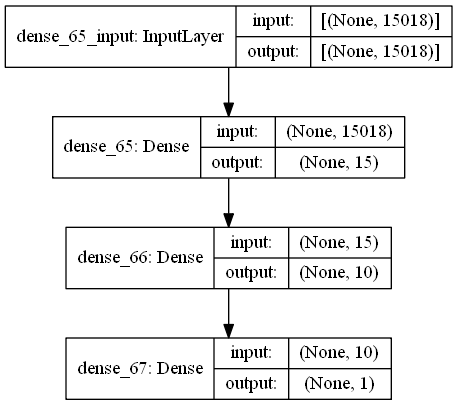

In [101]:
import tensorflow
from keras.utils.vis_utils import plot_model
tensorflow.keras.utils.plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [61]:
#Compilamos el modelo
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [62]:
#Entrenamos el modelo sin callbacks
history=model.fit(x=X_train,y=y_train,
                 epochs=15,batch_size=512,validation_data=(X_val,y_val))

Train on 29016 samples, validate on 5803 samples
Epoch 1/15
29016/29016 [==============================] - 64s 2ms/sample - loss: 0.3821 - acc: 0.9315 - val_loss: 0.2647 - val_acc: 0.9807
Epoch 2/15
29016/29016 [==============================] - 52s 2ms/sample - loss: 0.2083 - acc: 0.9889 - val_loss: 0.1788 - val_acc: 0.9871
Epoch 3/15
29016/29016 [==============================] - 42s 1ms/sample - loss: 0.1431 - acc: 0.9948 - val_loss: 0.1334 - val_acc: 0.9897
Epoch 4/15
29016/29016 [==============================] - 47s 2ms/sample - loss: 0.1053 - acc: 0.9973 - val_loss: 0.1037 - val_acc: 0.9900
Epoch 5/15
29016/29016 [==============================] - 52s 2ms/sample - loss: 0.0784 - acc: 0.9982 - val_loss: 0.0830 - val_acc: 0.9912
Epoch 6/15
29016/29016 [==============================] - 43s 1ms/sample - loss: 0.0592 - acc: 0.9989 - val_loss: 0.0692 - val_acc: 0.9912
Epoch 7/15
29016/29016 [==============================] - 42s 1ms/sample - loss: 0.0449 - acc: 0.9992 - val_loss: 0.0

In [63]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

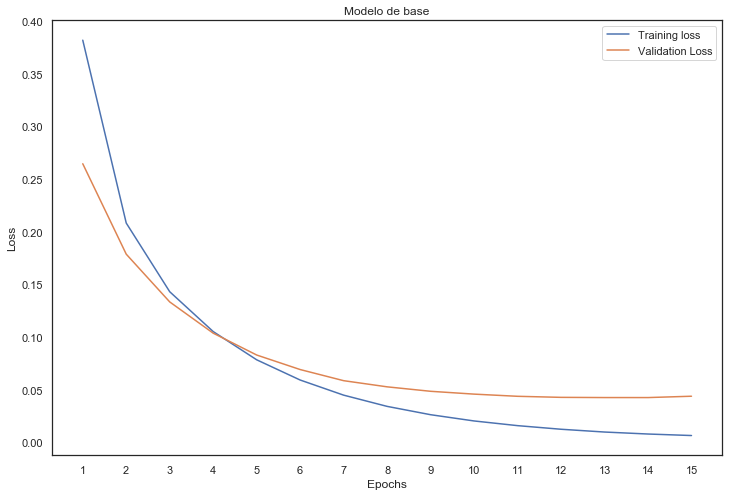

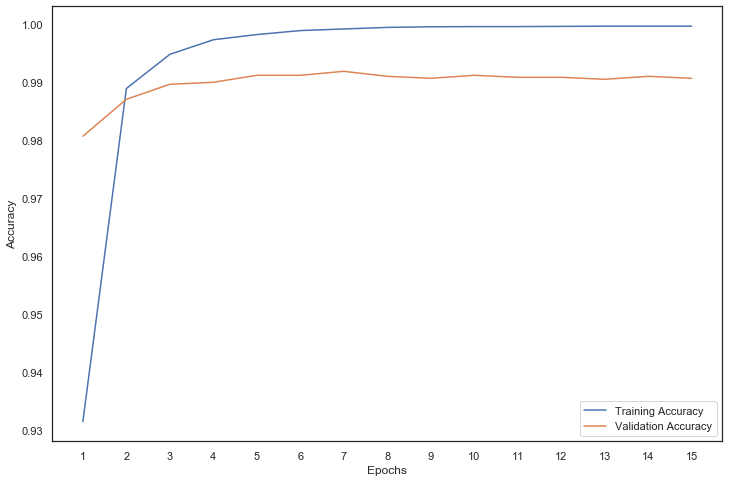

In [64]:
acc=history.history['acc']
val_loss=history.history['val_loss']
loss=history.history['loss']
val_acc=history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss','Validation Loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.xticks(ticks=epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy']);

In [65]:
#Vemos como performa con el set de test
res_1_train=model.evaluate(X_train,y_train)[1]*100
print(res_1_train)
res_1_test=model.evaluate(X_test,y_test)[1]*100
print(res_1_test)


29016/29016 [==============================] - 47s 2ms/sample - loss: 0.0059 - acc: 0.9997
99.96898174285889
3869/3869 [==============================] - 4s 994us/sample - loss: 0.0382 - acc: 0.9912
99.12121891975403


## Modelo 2: Simple, sin callbacks con regularizacion y dropout

In [66]:
dropout_rate=0.2

model2=Sequential()
model2.add(Dense(15,activation='relu',input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dropout(dropout_rate))
model2.add(Dense(10,activation='sigmoid',kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                225285    
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 225,456
Trainable params: 225,456
Non-trainable params: 0
_________________________________________________________________


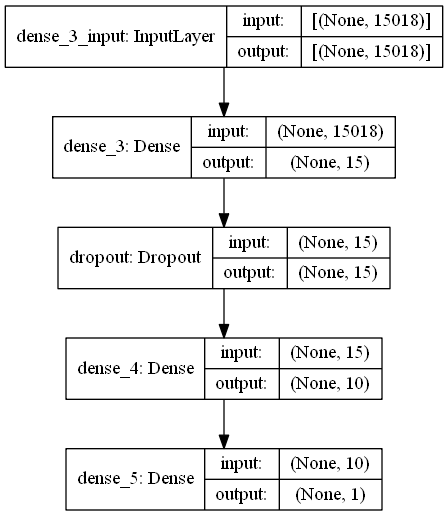

In [102]:
tensorflow.keras.utils.plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

In [67]:
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
tok=time.time()
history2=model2.fit(X_train,
                   y_train,
                   epochs=15,
                   batch_size=512,
                   validation_data=(X_val,y_val))
tiempo=(time.time()-tok)/60
print('--- %s minutes ---' % tiempo)

Train on 29016 samples, validate on 5803 samples
Epoch 1/15
29016/29016 [==============================] - 59s 2ms/sample - loss: 0.1829 - acc: 0.9949 - val_loss: 0.1739 - val_acc: 0.9967
Epoch 2/15
29016/29016 [==============================] - 45s 2ms/sample - loss: 0.1829 - acc: 0.9951 - val_loss: 0.1760 - val_acc: 0.9967
Epoch 3/15
29016/29016 [==============================] - 50s 2ms/sample - loss: 0.1838 - acc: 0.9949 - val_loss: 0.1787 - val_acc: 0.9967
Epoch 4/15
29016/29016 [==============================] - 46s 2ms/sample - loss: 0.1826 - acc: 0.9950 - val_loss: 0.1770 - val_acc: 0.9967
Epoch 5/15
29016/29016 [==============================] - 49s 2ms/sample - loss: 0.1816 - acc: 0.9951 - val_loss: 0.1739 - val_acc: 0.9966
Epoch 6/15
29016/29016 [==============================] - 54s 2ms/sample - loss: 0.1819 - acc: 0.9950 - val_loss: 0.1845 - val_acc: 0.9967
Epoch 7/15
29016/29016 [==============================] - 44s 2ms/sample - loss: 0.1825 - acc: 0.9948 - val_loss: 0.1

In [69]:
history2_dict=history2.history
history2_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

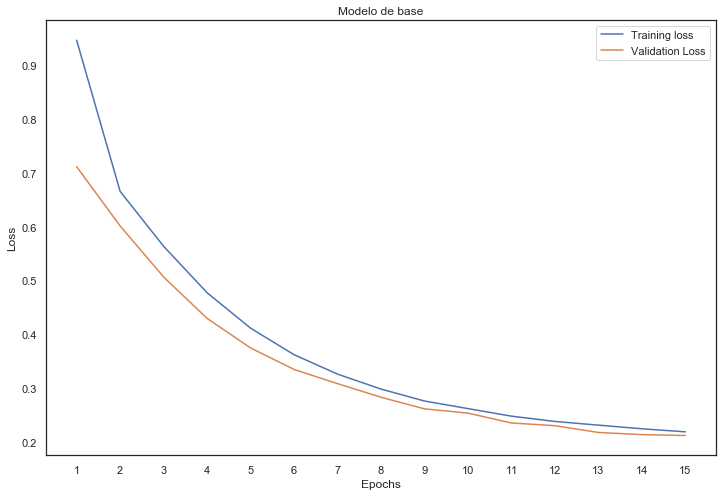

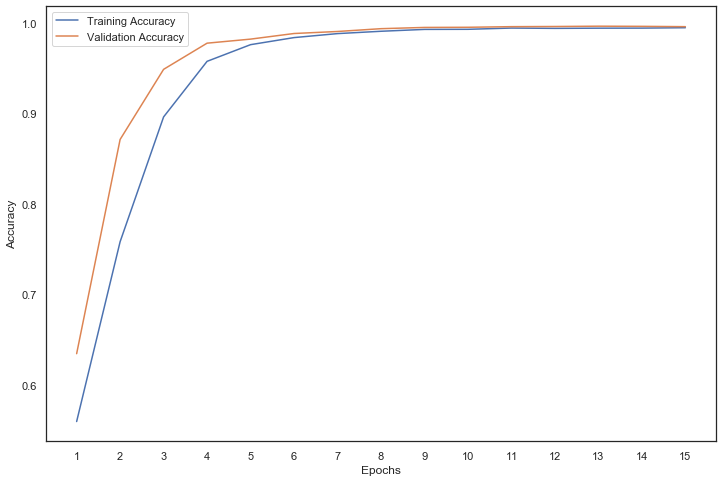

In [70]:
acc=history2.history['acc']
val_loss=history2.history['val_loss']
loss=history2.history['loss']
val_acc=history2.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss','Validation Loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.xticks(ticks=epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy']);

In [71]:
## Vemos como performa con el set de test
res_2_train=model2.evaluate(X_train,y_train)[1]*100
print(res_2_train)
res_2_test=model2.evaluate(X_test,y_test)[1]*100
print(res_2_test)

29016/29016 [==============================] - 57s 2ms/sample - loss: 0.2124 - acc: 0.9957
99.5726466178894
3869/3869 [==============================] - 4s 1ms/sample - loss: 0.2112 - acc: 0.9961
99.61230158805847


In [72]:
#Creamos un DataFrame para ir almacenando la informacion de los modelos
df_Results=pd.DataFrame(columns=['Model','Train Acc','Test Acc','Train Acc - Test Acc'])

df_Results.loc[1,'Model']='Modelo 1'
df_Results.loc[1,'Train Acc']=res_1_train
df_Results.loc[1,'Test Acc']=res_1_test
df_Results.loc[1,'Train Acc - Test Acc']=res_1_train-res_1_test

df_Results.loc[2,'Model']='Modelo 2'
df_Results.loc[2,'Train Acc']=res_2_train
df_Results.loc[2,'Test Acc']=res_2_test
df_Results.loc[2,'Train Acc - Test Acc']=res_2_train-res_2_test

df_Results

,Model,Train Acc,Test Acc,Train Acc - Test Acc
1,Modelo 1,99.969,99.1212,0.847763
2,Modelo 2,99.5726,99.6123,-0.039655


## Modelo 3: Con callbacks y regularizacion y RandomizedSearch

In [79]:
def model3(train_data=X_train,units=256,dropout_rate=0.2):
    model3=Sequential()
    model3.add(Dense(units,activation='relu',input_shape=(15018,),
                    kernel_regularizer=regularizers.l1(0.001)))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(units,activation='sigmoid',kernel_regularizer=regularizers.l1(0.001)))
    model3.add(Dense(1,activation='sigmoid'))
    
    model3.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model3

In [80]:
wrapper = KerasClassifier(model3,batch_size=512,epochs=15,verbose=1)

In [81]:
from sklearn.model_selection import RandomizedSearchCV
params={'units':[10,25,50],
       'dropout_rate':[0.4,0.5]}

grid=RandomizedSearchCV(wrapper,params,cv=3)

In [82]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=4,restore_best_weights=True,verbose=1)
callbacks=[reduce_lr,early_stopping]

tok=time.time()
grid.fit(X_train,y_train,validation_split=0.2,batch_size=512,epochs=40,callbacks=callbacks,verbose=1)
tiempo=(time.time()-tok)/60/60
print('--- %s horas ---' % tiempo)

C:\Anaconda\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Train on 15475 samples, validate on 3869 samples
Epoch 1/40
15475/15475 [==============================] - 24s 2ms/sample - loss: 0.8923 - acc: 0.6969 - val_loss: 0.6434 - val_acc: 0.8325
Epoch 2/40
15475/15475 [==============================] - 26s 2ms/sample - loss: 0.6229 - acc: 0.8644 - val_loss: 0.5528 - val_acc: 0.9509
Epoch 3/40
15475/15475 [==============================] - 23s 2ms/sample - loss: 0.5561 - acc: 0.9296 - val_loss: 0.4895 - val_acc: 0.9749
Epoch 4/40
15475/15475 [==============================] - 24s 2ms/sample - loss: 0.5023 - acc: 0.9552 - val_loss: 0.4404 - val_acc: 0.9757
Epoch 5/40
15475/15475 [==============================] - 24s 2ms/sample - loss: 0.4573 - acc: 0.9634 - val_loss: 0.3970 - val_acc: 0.9785
Epoch 6/40
15475/15475 [==============================] - 23s 2ms/sample - loss: 0.4190 - acc: 0.9693 - val_loss: 0.3641 - val_acc: 0.9791
Epoch 7/40
15475/15475 [==============================] - 24s 2ms/sample - loss: 0.3875 - acc: 0.9712 - val_loss: 0.3

In [83]:
print(grid.best_score_.round(5))
print(grid.best_estimator_.get_params())

0.99552
{'batch_size': 512, 'epochs': 15, 'verbose': 1, 'units': 10, 'dropout_rate': 0.5, 'build_fn': <function model3 at 0x0000027ADFB19C18>}


In [84]:
y_pred_grid =grid.predict(X_test)
res_3_test=accuracy_score(y_test, y_pred_grid)
print('Accuracy=', res_3_test)

y_train_grid=grid.predict(X_train)
res_3_train=accuracy_score(y_train, y_train_grid)
print('Accuracy=', res_3_train)


3869/3869 [==============================] - 3s 658us/sample
Accuracy= 0.9968984233652106
29016/29016 [==============================] - 37s 1ms/sample
Accuracy= 0.9957264957264957


In [87]:
df_Results.loc[3,'Model']='Modelo 3'
df_Results.loc[3,'Train Acc']=res_3_train
df_Results.loc[3,'Test Acc']=res_3_test
df_Results.loc[3,'Train Acc - Test Acc']=res_3_train-res_3_test

df_Results

,Model,Train Acc,Test Acc,Train Acc - Test Acc
1,Modelo 1,99.969,99.1212,0.847763
2,Modelo 2,99.5726,99.6123,-0.039655
3,Modelo 3,0.995726,0.996898,-0.00117193
